## Plots of resonance/novelty

In [3]:
import pandas as pd
import os

In [4]:
## functions from Maris' code ##
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes
import datetime as dt

def set_base_plot_settings(fontsize, if_palette):
    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=False, ticks=False, fontsize=fontsize)
    a4_dims = (25,15)
    
    if if_palette:
        #          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
        palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
    else:
        palette = 0
    
    fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
    sns.set(font_scale = 2)

    return fig, ax1, palette

def set_late_plot_settings(if_dates):
    ax1.set(xlabel="", ylabel = "")
    ax1.xaxis.get_label().set_fontsize(40)
    ax1.yaxis.get_label().set_fontsize(40)

    ax1.grid(color='darkgrey', linestyle='-', linewidth=0.5, which= "both")
    if if_dates:
        # Define the date format
        ax1.xaxis_date()
        date_form = mdates.DateFormatter("%b-%Y")
        ax1.xaxis.set_major_formatter(date_form)

    return fig, ax1

In [5]:
file = "tweets_emo_date_W3_smoothed_150"
smooth = True

if smooth:
    filename = os.path.join("..","idmdl", "smoothed", f"{file}.csv")
else:
    filename = os.path.join("..","idmdl", f"{file}.csv")

df = pd.read_csv(filename)

df.head()

,Unnamed: 0,date,emo_prob,novelty,transience,resonance,nsigma,tsigma,rsigma,smoothed_transience,smoothed_novelty,smoothed_resonance
0,0,2019-01-01,"[0.13655387965800936, 0.13095321826100983, 0.3...",0.000000,0.007187,0.000000,0.000000,0.001711,0.000000,0.002523,0.000912,0.000458
1,1,2019-01-02,"[0.08091568521634232, 0.09035963937652772, 0.3...",0.000000,0.003413,0.000000,0.000000,0.001666,0.000000,0.002442,0.000947,0.000424
2,2,2019-01-03,"[0.08403529679919247, 0.0910697144345674, 0.30...",0.000000,0.001530,0.000000,0.000000,0.000498,0.000000,0.002361,0.000981,0.000391
3,3,2019-01-04,"[0.0866288507944467, 0.10716675546084177, 0.30...",0.003033,0.000656,0.002376,0.001695,0.000125,0.000910,0.002280,0.001016,0.000357
4,4,2019-01-05,"[0.08950032989547523, 0.11767038233149285, 0.2...",0.002756,0.001509,0.001246,0.002022,0.001012,0.001517,0.002199,0.001050,0.000323


In [6]:
df["date"] = pd.to_datetime(df["date"])

In [7]:
# event_dict is a dictionary of the events to be plotted
event_dict = {"first lockdown": dt.datetime(2020, 3, 11),
              "Queens speech": dt.datetime(2020, 3, 17),
              "phase 1 reopning": dt.date(2020, 4, 14),
              "mask in public transport": dt.datetime(2020, 8, 22),
              "meet-up limit 50-10": dt.datetime(2020, 10, 23),
              "mink": dt.datetime(2020,11,4),
              "second lockdown": dt.datetime(2020, 12, 16),
              # "christmas": dt.datetime(2020, 12, 24),
              # "new year": dt.datetime(2020, 12, 31),
              "first vaccine": dt.datetime(2020,12,27),
              "Pfizer approved": dt.datetime(2021, 1, 6),
              "lockdown extended": dt.datetime(2021, 1, 28),
              "AZ paused": dt.datetime(2021, 3, 11),
              "AZ withdrawn": dt.datetime(2021, 4, 4),
            #   "coronapas launced": dt.datetime(2021, 5, 27),
              # "announced restrictions-lifting": dt.datetime(2021, 8, 27),
              # "all restrictions lifted": dt.datetime(2021, 9, 10),
              "somalian funeral": dt.datetime(2020, 7, 31)
              }
event_dict = {
  "christmas": dt.datetime(2019,12,24),
  "new year": dt.datetime(2019,12,31)
}


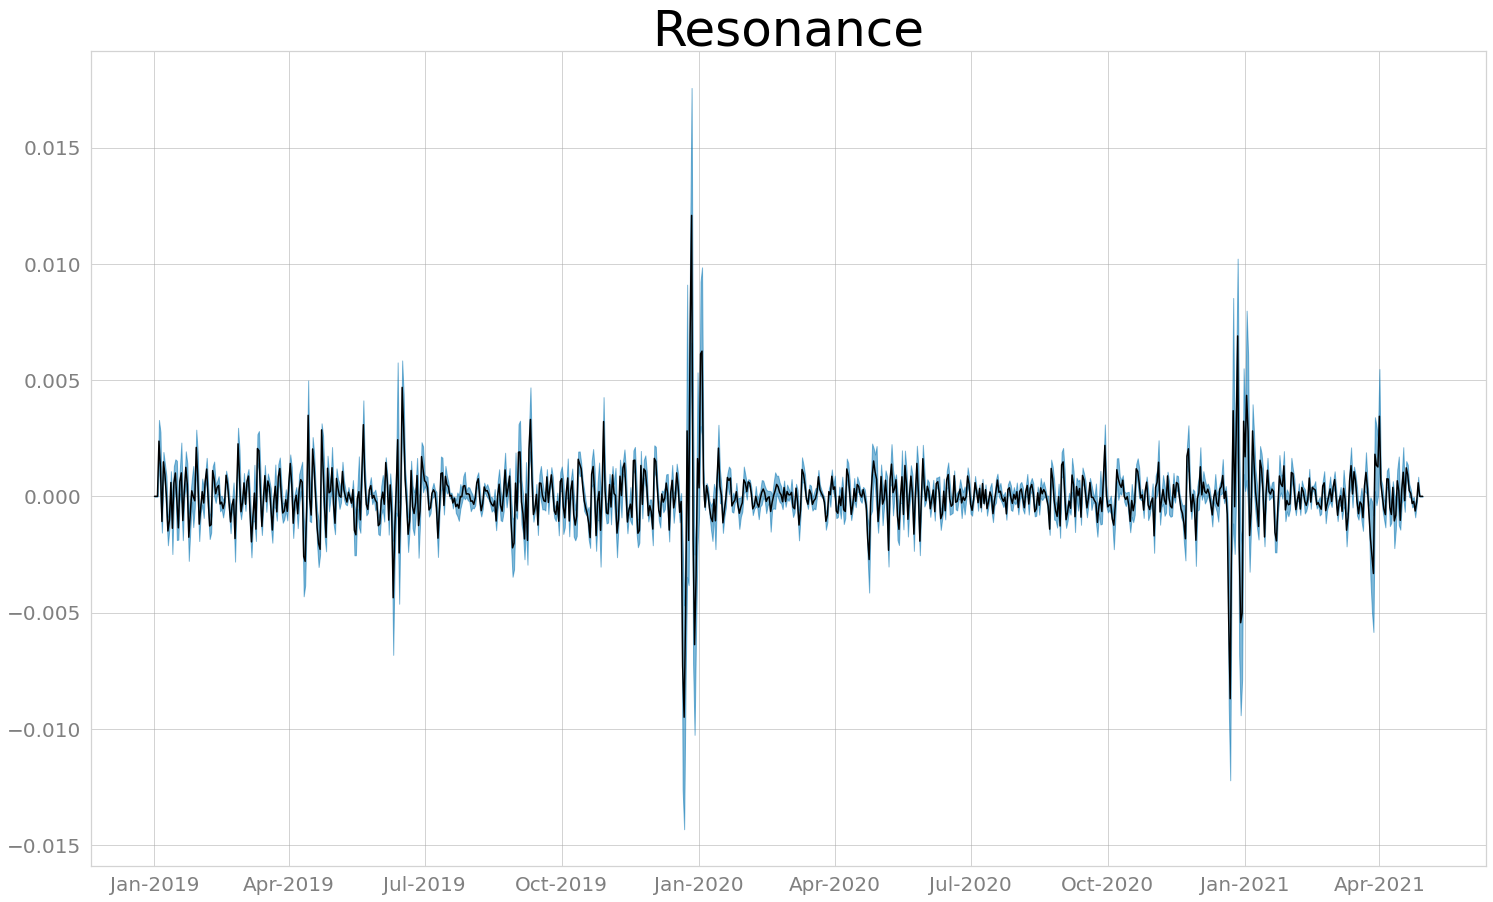

In [8]:
fig, ax1, palette = set_base_plot_settings(fontsize=20, if_palette = True)

x = df['date']
y = df['resonance']
error = df['rsigma']

plt.plot(x, y, color=palette[0])
plt.fill_between(x, y-error, y+error,
                 alpha=0.5, edgecolor=palette[5], facecolor=palette[5])

# for event, time in event_dict.items():
#     plt.vlines(x = time, ymax=0.015, ymin=-0.015, colors='Red',
#                label = event, linestyle = 'dashed')
#     plt.text(x = time, y = 0.010,
#          s = event,
#          fontdict = dict(color="black",size=20),
#         #  bbox = dict(facecolor="white",alpha=0.5), 
#          rotation=90)

fig, ax1 = set_late_plot_settings(if_dates = True)
ax1.set_title("Resonance", fontdict = {'fontsize':50}, color = "Black")
# plt.xticks(rotation=60)

# plt.savefig('../fig/recol_resonance_events.png')
plt.show()

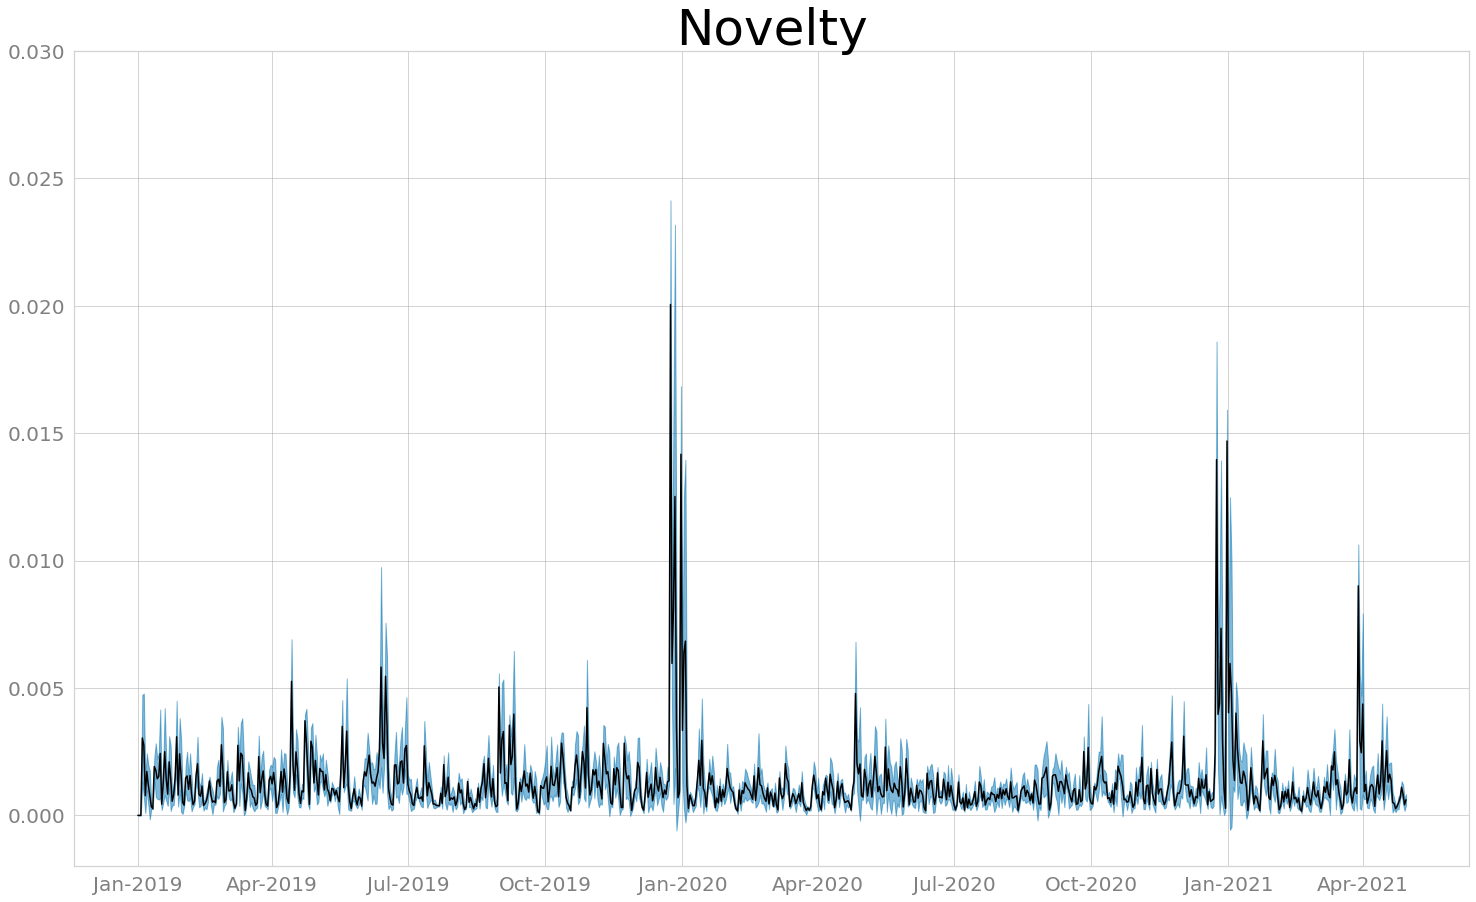

In [9]:
fig, ax1, palette = set_base_plot_settings(fontsize=20, if_palette = True)

x = df['date']
y = df['novelty']
error = df['nsigma']

plt.plot(x, y, color=palette[0])
plt.fill_between(x, y-error, y+error,
                 alpha=0.5, edgecolor=palette[5], facecolor=palette[5])

# for event, time in event_dict.items():
#     plt.vlines(x = time, ymax=0.025, ymin=-0.001, colors='Red',
#                label = event, linestyle = 'dashed')
#     plt.text(x = time+ dt.timedelta(hours=12), y = 0.018,
#          s = event,
#          fontdict = dict(color="black",size=20),
#         #  bbox = dict(facecolor="white",alpha=0.5),
#          rotation=90)

fig, ax1 = set_late_plot_settings(if_dates = True)
ax1.set_title("Novelty", fontdict = {'fontsize':50}, color = "Black")
# plt.xticks(rotation=60)
plt.ylim((-0.002,0.03))

# plt.savefig('../fig/recol_novelty_events.png')
plt.show()

In [49]:
def plot_novelty_resonance(df, label=None, smooth=None, event_dict=None, save_fig = False, plot_name = None):
    fontsize = 20

    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=False, ticks=False, fontsize=fontsize)
    a4_dims = (25,15)


    #          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
    palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]


    fig, (ax1, ax2) = plt.subplots(2, figsize=a4_dims)
    sns.set(font_scale = 2)

    if smooth:
      raw_color = palette[5]
      smooth_color = palette[0]
    else:
      raw_color = palette[0]


    locator = mdates.MonthLocator()  # every month
    date_form = mdates.DateFormatter("%b-%Y")
    X = plt.gca().xaxis
    X.set_major_locator(locator)
    # resonance
    xr = df['date']
    yr = df['resonance']
    yr_smoothed = df['smoothed_resonance']
    # errorr = df['rsigma']

    ax1.plot(xr, yr, color=raw_color, alpha=0.5, label='Raw signal')
    # ax1.fill_between(xr, yr-errorr, yr+errorr,
    #                 alpha=0.5, edgecolor=palette[5], facecolor=palette[5])
    if smooth:
      ax1.plot(xr, yr_smoothed, color=smooth_color, linewidth=2, label=f'Smoothed with span {smooth}')

    # events
    if event_dict:
      for event, time in event_dict.items():
          # ax2.vlines(x = time, ymax=0.025, ymin=-0.002, colors='Red',
          #            label = event, linestyle = 'dashed')
          ax1.plot(time, yr_smoothed[xr == time], 
                  marker='o', markersize=20, markeredgecolor="black", markerfacecolor="None")
          ax1.text(time, yr_smoothed[xr == time] + 0.001,
               s = event,
               fontdict = dict(color="black",size=15),
              #  bbox = dict(facecolor="white",alpha=0.5),
               rotation=90)


    # axis
    ax1.set(xlabel="", ylabel = "")
    # ax2.xaxis.get_label().set_fontsize(40)
    # ax2.yaxis.get_label().set_fontsize(40)
    ax1.tick_params(axis='both', labelsize=15)

    ax1.grid(color='darkgrey', linestyle='-', linewidth=0.5, which= "both", alpha=0.5)
    # Define the date format
    ax1.xaxis_date()
    # locator = mdates.MonthLocator()  # every month
    # date_form = mdates.DateFormatter("%b-%Y")
    # X = plt.gca().xaxis
    # X.set_major_locator(locator)
    ax1.xaxis.set_major_formatter(date_form)
    # plt.xticks(rotation=90)
    every_nth = 2
    for n, label_ in enumerate(ax1.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label_.set_visible(False)
    
    if label:
        ax1.set_title(f"Resonance no {label}", fontdict = {'fontsize':30}, color = "Black")
    else:
      ax1.set_title(f"Resonance", fontdict = {'fontsize':30}, color = "Black")  

    # novelty
    xn = df['date']
    yn = df['novelty']
    yn_smoothed = df['smoothed_novelty']
    # errorn = df['nsigma']

    ax2.plot(xn, yn, color=raw_color, alpha=0.5, label='Raw signal')
    # ax2.fill_between(xn, yn-errorn, yn+errorn,
    #                 alpha=0.5, edgecolor=palette[5], facecolor=palette[5])
    if smooth:
      ax2.plot(xr, yn_smoothed, color=smooth_color, linewidth=2, label=f'Smoothed with span {smooth}')

    # events
    if event_dict:
      for event, time in event_dict.items():
          # ax2.vlines(x = time, ymax=0.025, ymin=-0.002, colors='Red',
          #            label = event, linestyle = 'dashed')
          ax2.plot(time, yn_smoothed[xn == time], 
                  marker='o', markersize=20, markeredgecolor="black", markerfacecolor="None")
          ax2.text(time, yn_smoothed[xn == time] + 0.001,
               s = event,
               fontdict = dict(color="black",size=15),
              #  bbox = dict(facecolor="white",alpha=0.5),
               rotation=90)

    # axis
    ax2.set(xlabel="", ylabel = "")
    # ax2.xaxis.get_label().set_fontsize(40)
    # ax2.yaxis.get_label().set_fontsize(40)
    ax2.tick_params(axis='both', labelsize=15)

    ax2.grid(color='darkgrey', linestyle='-', linewidth=0.5, which= "both", alpha=0.5)
    # Define the date format
    ax2.xaxis_date()
    # locator = mdates.MonthLocator()  # every month
    # date_form = mdates.DateFormatter("%b-%Y")
    # X = plt.gca().xaxis
    # X.set_major_locator(locator)
    ax2.xaxis.set_major_formatter(date_form)
    # plt.xticks(rotation=90)
    every_nth = 2
    for n, label_ in enumerate(ax2.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label_.set_visible(False)

    # title        
    if label:
        ax2.set_title(f"Novelty no {label}", fontdict = {'fontsize':30}, color = "Black")
    else:
      ax2.set_title(f"Novelty", fontdict = {'fontsize':30}, color = "Black")

    plt.subplots_adjust(hspace=0.3)
    if save_fig:
        plt.savefig(plot_name)
    plt.show()

In [58]:
def plot_novelty_resonance(df, measure, label=None, smooth=None, event_dict=None, save_fig = False, plot_name = None):
    fontsize = 20

    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=False, ticks=False, fontsize=fontsize)
    a4_dims = (25,15)


    #          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
    palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

    fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
    sns.set(font_scale = 2)

    if smooth:
      raw_color = palette[5]
      smooth_color = palette[0]
    else:
      raw_color = palette[0]


    locator = mdates.MonthLocator()  # every month
    date_form = mdates.DateFormatter("%b-%Y")
    X = plt.gca().xaxis
    X.set_major_locator(locator)
    

    x = df['date']
    y = df[measure]
    y_smoothed = df[f'smoothed_{measure}']

    plt.plot(x, y, color=raw_color, alpha=0.5, label='Raw signal')

    if smooth:
      plt.plot(x, y_smoothed, color=smooth_color, linewidth=2, label=f'Smoothed with span {smooth}')

    # events
    if event_dict:
      for event, time in event_dict.items():
          plt.plot(time, y_smoothed[x == time], 
                  marker='o', markersize=20, markeredgecolor="black", markerfacecolor="None")
          plt.text(time, y_smoothed[x == time] + 0.001,
               s = event,
               fontdict = dict(color="black",size=15),
              #  bbox = dict(facecolor="white",alpha=0.5),
               rotation=90)


    # axis
    ax1.set(xlabel="", ylabel = "")
    ax1.tick_params(axis='both', labelsize=15)

    ax1.grid(color='darkgrey', linestyle='-', linewidth=0.5, which= "both", alpha=0.5)
    # Define the date format
    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(date_form)
    # plt.xticks(rotation=90)
    every_nth = 2
    for n, label_ in enumerate(ax1.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label_.set_visible(False)
    
    if label:
      ax1.set_title(f"{measure} no {label}", fontdict = {'fontsize':30}, color = "Black")
    else:
      ax1.set_title(measure, fontdict = {'fontsize':30}, color = "Black")  

    plt.subplots_adjust(hspace=0.3)
    if save_fig:
        plt.savefig(plot_name)
    plt.show()

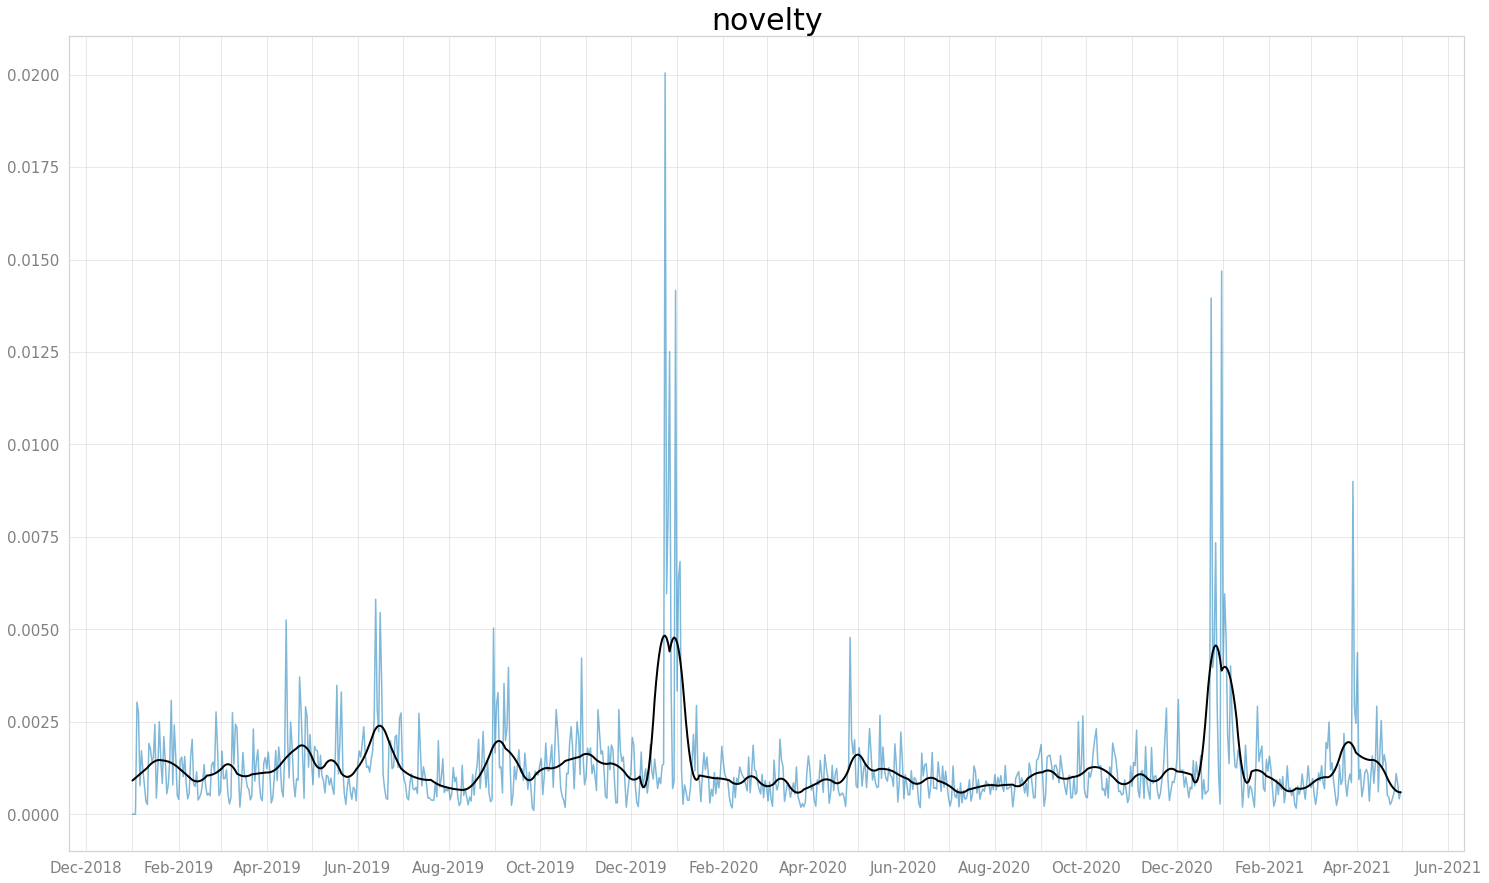

In [63]:
plot_novelty_resonance(df,measure='novelty', smooth=150, save_fig=True, plot_name='../fig/W3_smooth150_nov.png')

## Emotions driving the effect

In [13]:
labels = [
        "Glæde/Sindsro",
        "Tillid/Accept",
        "Forventning/Interrese",
        "Overasket/Målløs",
        "Vrede/Irritation",
        "Foragt/Modvilje",
        "Sorg/trist",
        "Frygt/Bekymret",
    ]

In [6]:
all_emo_dfs = []
for label in labels:
    filename = os.path.join("..", "idmdl", f"tweets_emotion_no_{label[:4]}.csv")
    df = pd.read_csv(filename)
    df["date"] = pd.to_datetime(df["date"])
    all_emo_dfs.append(df)
    # plot_novelty_resonance(df, label)
    # plot_novelty_resonance(df, label, save_fig=True, plot_name=f"../fig/res_nov_no_{label[:4]}.png")
all_emo = pd.read_csv(os.path.join("..", "idmdl", "tweets_emotion_date.csv"))
all_emo["date"] = pd.to_datetime(all_emo["date"])
all_emo_dfs.append(all_emo)



In [41]:
def plot_all_excluded(dfs:list, measure:str, ymin:float, ymax:float, stacked=False, 
                      save_fig=False, plot_name=None, labels = [
            "Glæde/Sindsro",
            "Tillid/Accept",
            "Forventning/Interrese",
            "Overasket/Målløs",
            "Vrede/Irritation",
            "Foragt/Modvilje",
            "Sorg/trist",
            "Frygt/Bekymret",
            "All emotions included"
        ]):
    fig, axs = plt.subplots(3,3, figsize = (20,10))
    labelsize = 8
    matplotlib.rc('xtick', labelsize=labelsize) 
    matplotlib.rc('ytick', labelsize=labelsize) 
   
    themes.theme_minimal(grid=True, ticks=False, fontsize=10)
    k = 0
    j = 0
    for i, emotion in enumerate(labels):
        # ax1 = fig.add_subplot()
        x = dfs[i]["date"]
        y = dfs[i][measure]
        if stacked:
            axs[k, j].plot(x, y, linewidth = 0.5, 
                           color=palette[1], label=emotion)
            x = dfs[-1]["date"]
            y = dfs[-1][measure]
            axs[k, j].plot(x, y, linewidth = 0.5, 
                           color=palette[0], label='all')
        else:
            axs[k, j].plot(x, y, label = f'{emotion} excluded', linewidth = 0.5)
        axs[k, j].xaxis.set_major_locator(plt.MaxNLocator(5))
        axs[k, j].axis(ymin=ymin, ymax=ymax)
        axs[k, j].set_title(f'{emotion} excluded', fontdict = {"fontsize": 13}, color = "Black")
        # if stacked:
        #     axs[k, j].legend()
        if k == 2 and j == 2:
            axs[k, j].set_title(f'{emotion}', fontdict = {"fontsize": 13}, color = "Black")
        j += 1
        if j > 2:
            k += 1
            j = 0
    fig.suptitle(measure.capitalize(), fontsize=30, color="Black")
    plt.subplots_adjust(hspace=0.3)

    if save_fig:
        plt.savefig(plot_name)
    plt.show()

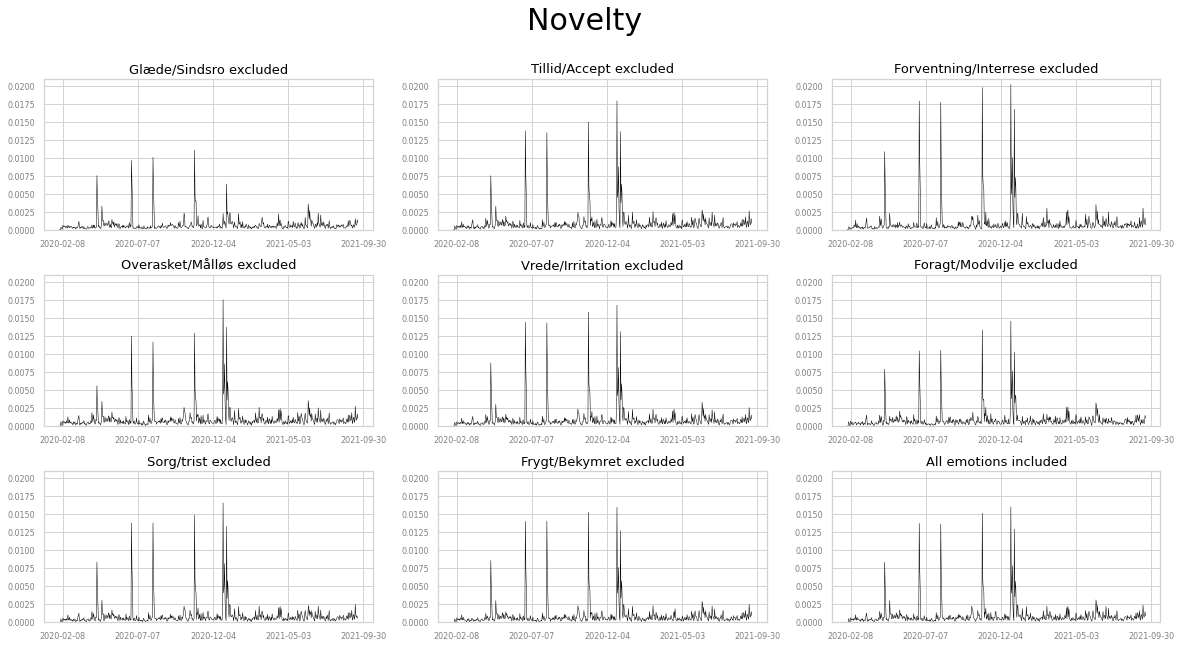

In [11]:
plot_all_excluded(all_emo_dfs, "novelty", ymin=0, ymax=0.021)#, save_fig=True, plot_name=f"../fig/novelty_emotions_excluded_all.png") 

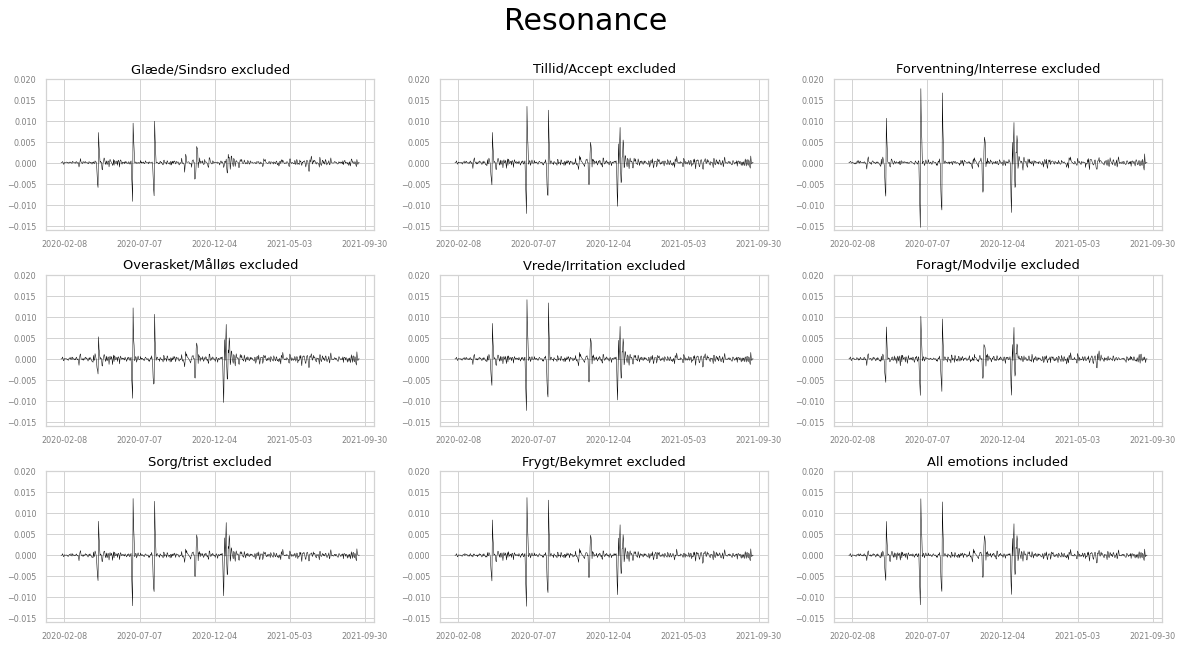

In [12]:
plot_all_excluded(all_emo_dfs, "resonance", ymin=-0.016, ymax=0.02)#, save_fig=True, plot_name=f"../fig/resonance_emotions_excluded_all.png")

In [24]:
for i, emo in enumerate(labels):
    two_emo_dfs = [all_emo_dfs[-1], all_emo_dfs[i]]
    two_labels = ['all', emo]

    fig, ax1, palette = set_base_plot_settings(fontsize=20, if_palette = True)

    for emo_label, df in zip(two_labels,two_emo_dfs):
        x = df['date']
        y = df['resonance']
        error = df['rsigma']
        if emo_label == 'all':
            plt.plot(x, y, color=palette[0], label=emo_label)
        else:
            plt.plot(x, y, color=palette[1], label=emo_label, alpha=0.5)
    # plt.fill_between(x, y-error, y+error,
    #                  alpha=0.5, edgecolor=palette[5], facecolor=palette[5])

    fig, ax1 = set_late_plot_settings(if_dates = True)
    ax1.set_title("Resonance", fontdict = {'fontsize':50}, color = "Black")
    # plt.xticks(rotation=60)
    # plt.ylim((-0.002,0.03))
    plt.legend()

    plt.show()

NameError: name 'labels' is not defined

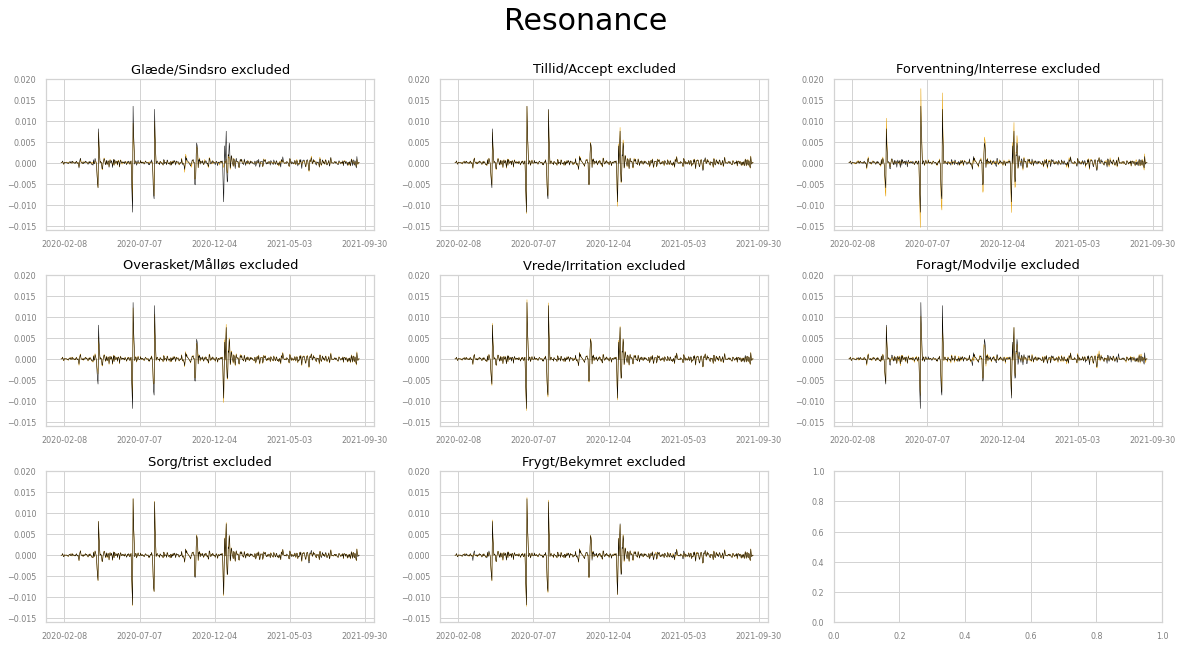

In [42]:
plot_all_excluded(all_emo_dfs, "resonance", ymin=-0.016, ymax=0.02, labels=labels, stacked=True)

### Compare the signal (recollected tweets)

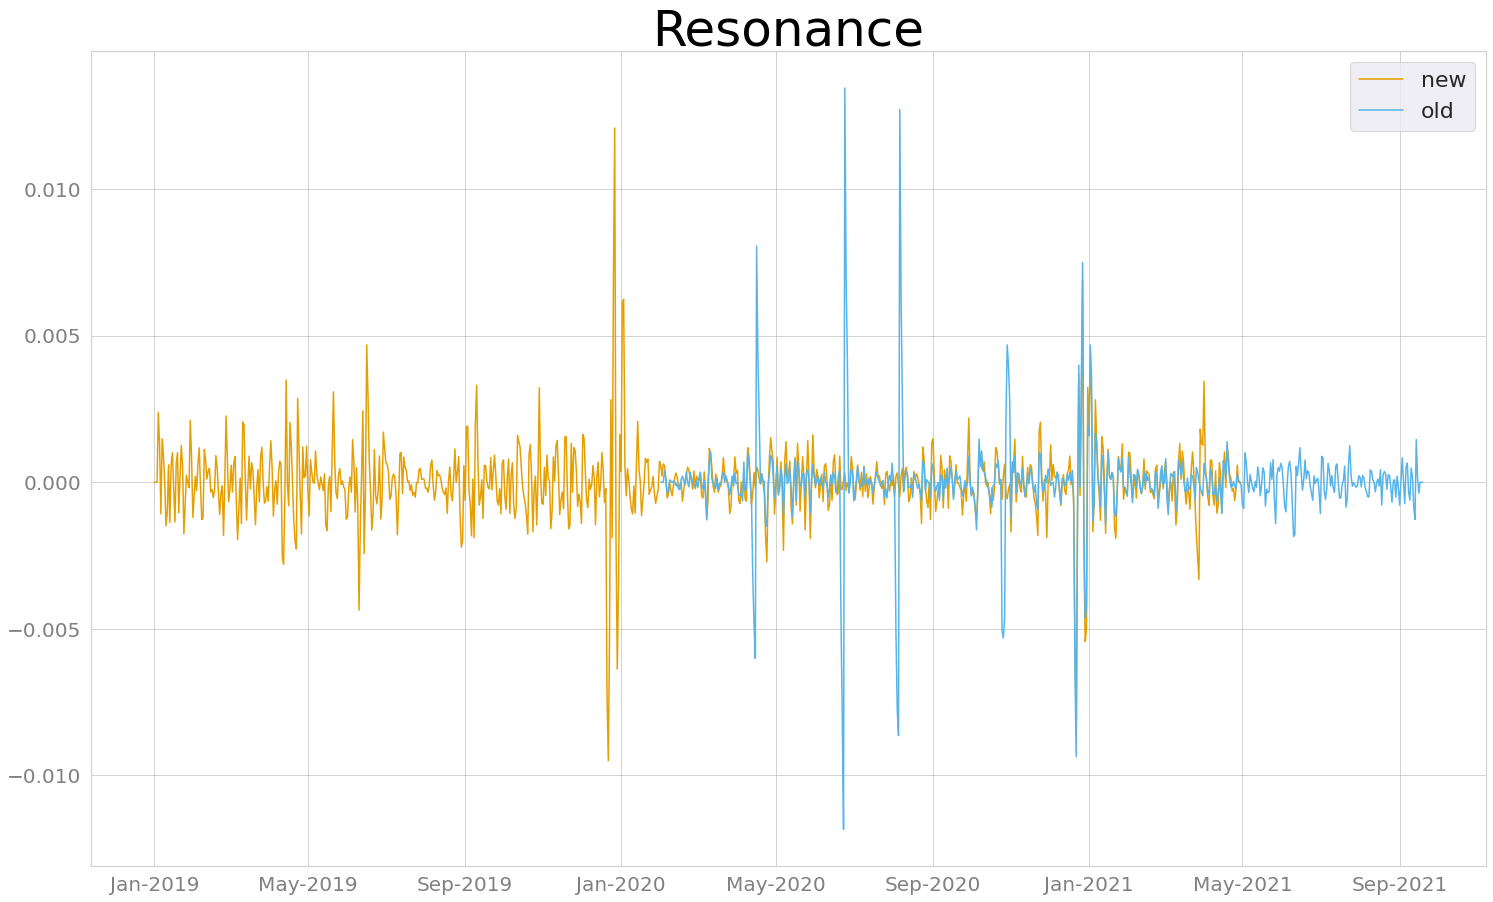

In [13]:
filename = os.path.join("..","idmdl", "tweets_recol_emotion_date.csv")
df_new = pd.read_csv(filename)
df_new["date"] = pd.to_datetime(df_new["date"])
filename = os.path.join("..","idmdl", "tweets_emotion_date.csv")
df_old = pd.read_csv(filename)
df_old["date"] = pd.to_datetime(df_old["date"])

two_dfs = [df_new, df_old]
two_labels = ['new', 'old']

fig, ax1, palette = set_base_plot_settings(fontsize=20, if_palette = True)

for i, (emo_label, df) in enumerate(zip(two_labels,two_dfs), start=1):
    x = df['date']
    y = df['resonance']
    plt.plot(x, y, color=palette[i], label=emo_label)

fig, ax1 = set_late_plot_settings(if_dates = True)
ax1.set_title("Resonance", fontdict = {'fontsize':50}, color = "Black")
plt.legend()

plt.show()